<a href="https://colab.research.google.com/github/palash-21/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
#The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. 
#In this problem, we do not have to predict the actual price but a price range indicating how high the price is..




#  Data Description :

Battery_power - Total energy a battery can store in one time measured in mAh        

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are on a call

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

# Data loading and pre-processing

In [ ]:
# Lets Equip all the tools we would need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore") 
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import train_test_split
from yellowbrick.target import ClassBalance
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,auc,f1_score,classification_report,hamming_loss

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_mob_data_csv = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/Mobile Price Range Classification/data_mobile_price_range.csv"
mob_df = pd.read_csv(path_mob_data_csv)

In [ ]:
# To display all columns
pd.set_option('display.max_columns', None)

In [ ]:
# Taking a glance on the datasets
print("no of observations & no of features", mob_df.shape)
mob_df.head()

no of observations & no of features (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Great!!! We dont have any nulls and the date type also looks correct

In [ ]:
mob_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


*   This dataset seems older as the specifications of mobiles are not from recent technologies like max 2000mah battery, 4gb ram,etc. 
*   There are some zeroes in the dataset. 

In [ ]:
# Front and primary camera may have zero indicating no camera 
# but its highly unlikely to have only front camera and no primary camera, lets check
mob_df[mob_df['pc']==0]['fc'].value_counts()

0    101
Name: fc, dtype: int64

This looks okay!!

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1481    0.1         99        4  11          0      1987  3692    13     0   
1933    0.6        154        8  10          0       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1  
indexes: [1481, 1933]
Skewness: 0.6662712560691598


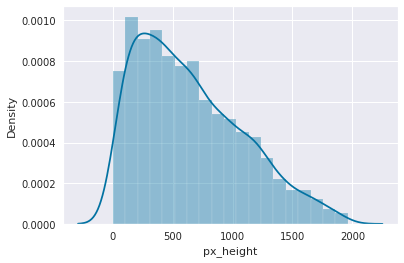

In [ ]:
#  Pixel resolution height 
print(mob_df[mob_df['px_height']==0])
indexes = list(mob_df[mob_df['px_height']==0].index)
print('indexes:',indexes)
print('Skewness:', mob_df['px_height'].skew())
sns.distplot(mob_df['px_height'])

In [ ]:
# We have two zero entries for pixel height, 
# Also there are entries with very low pixel height
# First we will replace both of these zeros with median
for index in indexes:
  mob_df.loc[index,'px_height']=int(mob_df['px_height'].median())
print(int(mob_df['px_height'].median()))

564


      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
12             1815     0          2.8         0   2       0          33   
24              503     0          1.2         1   5       1           8   
33             1310     1          2.2         1   0       1          51   
42             1253     1          0.5         1   5       1           5   
50             1547     1          3.0         1   2       1          14   
...             ...   ...          ...       ...  ..     ...         ...   
1918            772     0          1.0         1   0       1          23   
1920            591     1          0.5         1   1       1          16   
1946            590     1          1.2         1   0       0          32   
1954            686     1          2.7         1   0       0          36   
1981           1454     0          2.6         0   8       0           6   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
12      0

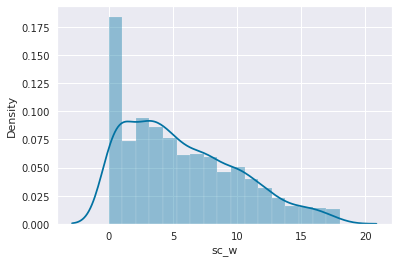

In [ ]:
#  Screen width 
print(mob_df[mob_df['sc_w']==0])
indexes = list(mob_df[mob_df['sc_w']==0].index)
print('indexes:',indexes)
print('Skewness:', mob_df['sc_w'].skew())
sns.distplot(mob_df['sc_w'])

In [ ]:
# We have 180 entries for zeroes i.e 9% 
# We will group by the price range and replace the 0 value of sc_width
# with the averaege of sc_width based on price_range
# Checking avg screen width vs price range
mob_df.groupby('price_range')['sc_w'].mean().astype(int)

price_range
0    5
1    5
2    5
3    6
Name: sc_w, dtype: int64

In [ ]:
# Replacing these zeros with avg width based on price range
mob_df['sc_w'] = mob_df['sc_w'].replace(0, np.nan)
mob_df['sc_w'] = mob_df['sc_w'].fillna(mob_df.groupby('price_range')['sc_w'].transform('mean').astype(int))
mob_df['sc_w'] = mob_df['sc_w'].astype(int)
mob_df[mob_df['sc_w']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

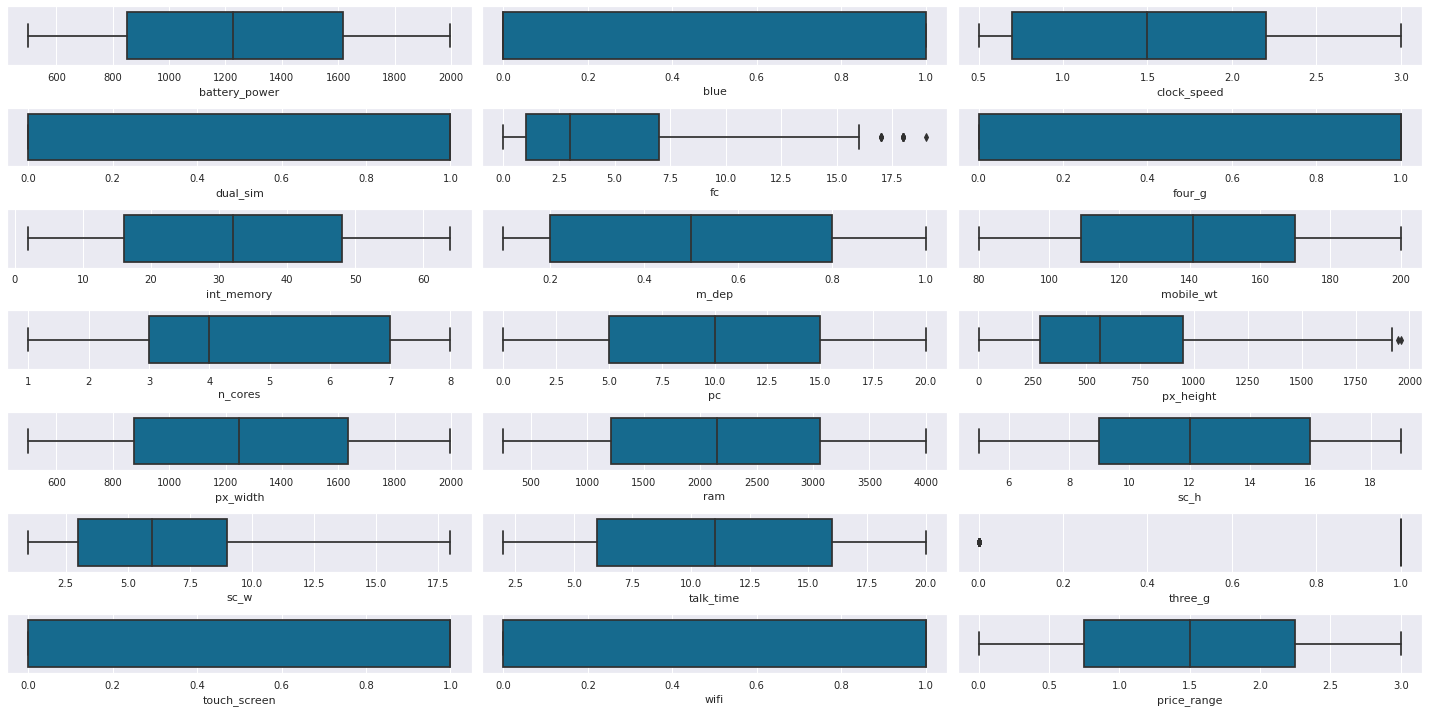

In [ ]:
## box plot 

plt.figure(figsize = (20, 10))
x = 1 

for column in mob_df.columns :
    plt.subplot(7, 3, x)
    sns.boxplot(mob_df[column])
    x+= 1

plt.tight_layout()

*   There are some outliers in fc(front camera)
*   Pixel height has lots of abnormally small values

In [ ]:
# Low values of pixel height

mob_df[mob_df['px_height']<200].describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.00000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,1229.362319,0.498551,1.529855,0.515942,4.414493,0.550725,33.127536,0.486957,139.368116,4.400000,9.863768,109.765217,1084.97971,2179.800000,12.069565,6.124638,11.234783,0.776812,0.486957,0.452174,1.353623
std,423.061220,0.500724,0.814731,0.500472,4.339424,0.498143,18.824958,0.295269,35.276575,2.312001,6.097225,56.505196,424.38329,1100.041663,4.065714,3.823748,5.282701,0.416988,0.500556,0.498430,1.121743
min,507.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,1.000000,501.00000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,880.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,2.000000,4.000000,64.000000,724.00000,1181.000000,9.000000,3.000000,7.000000,1.000000,0.000000,0.000000,0.000000
50%,1211.000000,0.000000,1.500000,1.000000,3.000000,1.000000,33.000000,0.500000,138.000000,4.000000,10.000000,115.000000,1022.00000,2290.000000,13.000000,6.000000,12.000000,1.000000,0.000000,0.000000,1.000000
75%,1584.000000,1.000000,2.200000,1.000000,7.000000,1.000000,50.000000,0.700000,171.000000,6.000000,15.000000,160.000000,1409.00000,3153.000000,15.000000,8.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,199.000000,1998.00000,3991.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Even for high end mobiles in the dataset, pixel height is low.
This is very abnormal
Lets do some quick resolution study


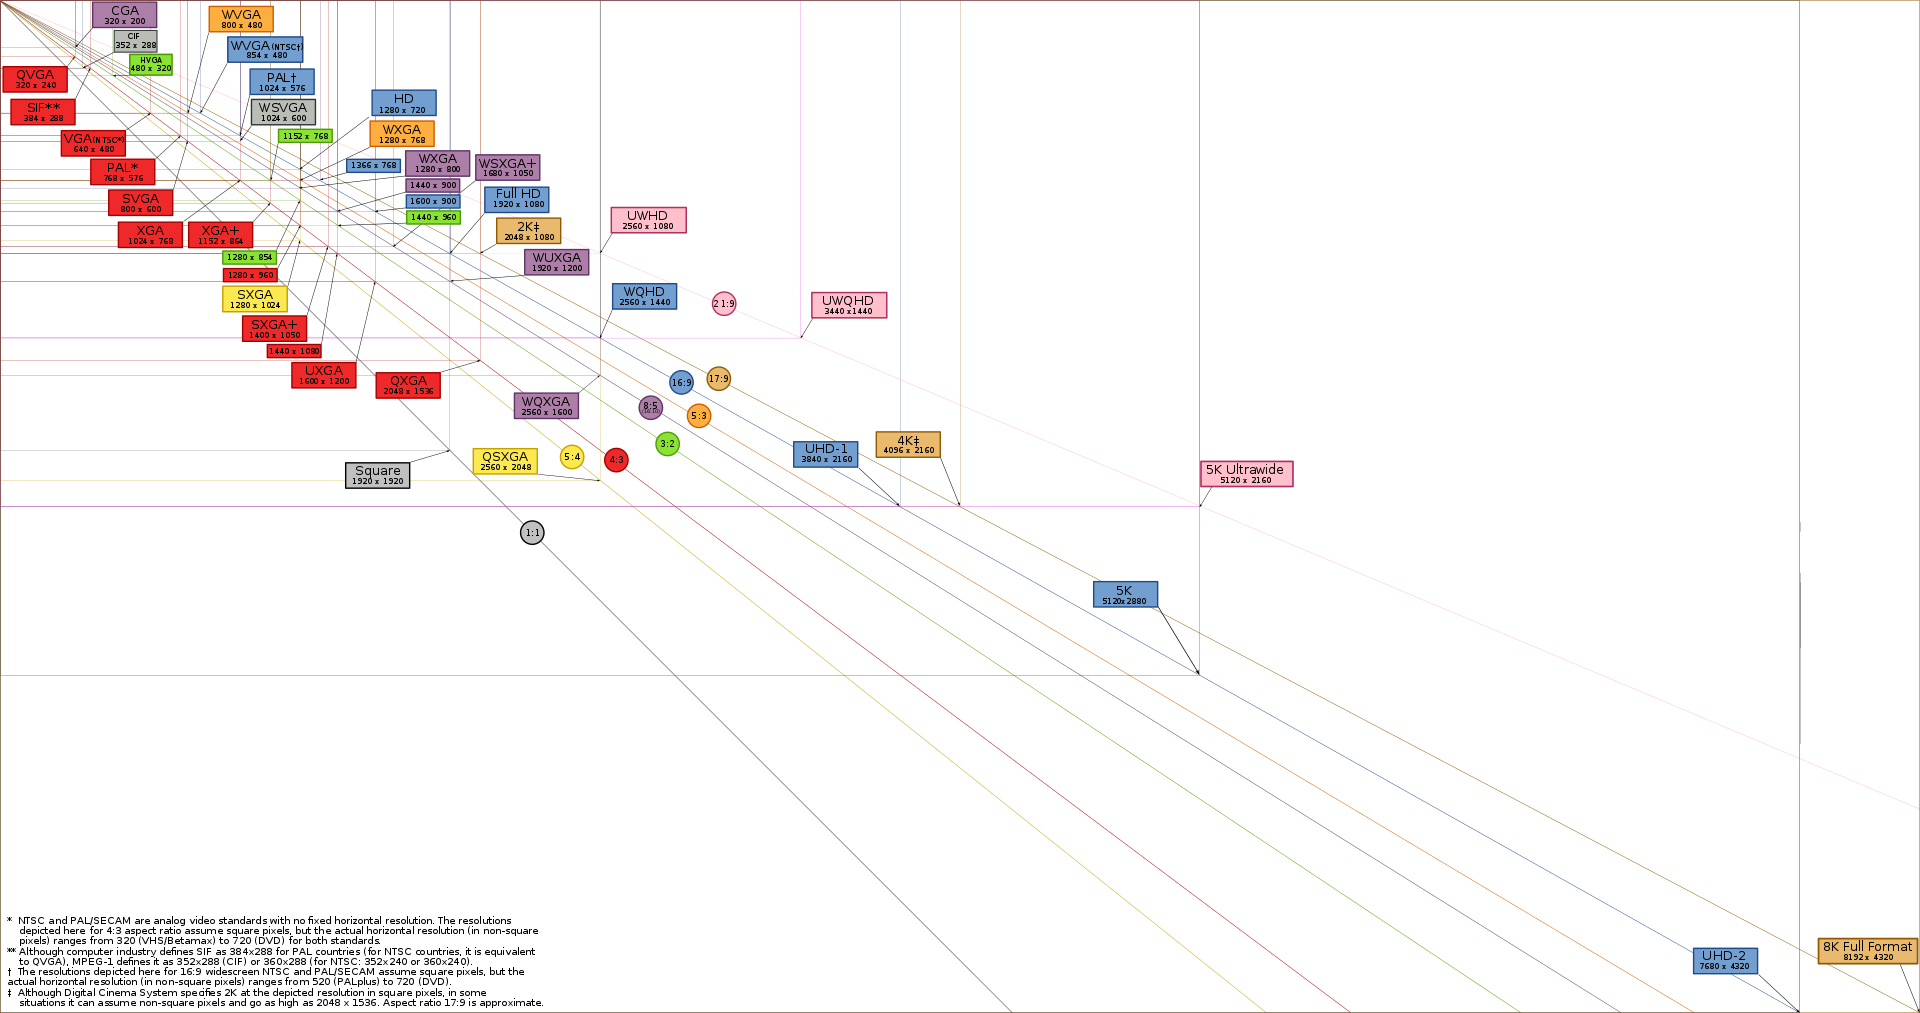

In [ ]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/Mobile Price Range Classification/1920px-Vector_Video_Standards.jpg", width = 1400, height = 1000)

In [ ]:
# We have taken this image from wikipedia page https://en.wikipedia.org/wiki/Ultrawide_formats
# Replacing all pixel heights less than 200 with average based on price range
mob_df.loc[mob_df['px_height']<200, 'px_height'] = np.nan
mob_df['px_height'] = mob_df['px_height'].fillna(mob_df.groupby('price_range')['px_height'].transform('mean').astype(int))
mob_df['px_height'] = mob_df['px_height'].astype(int)

In [ ]:
mob_df['ram'].value_counts()

1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: ram, Length: 1562, dtype: int64

In [ ]:
mob_df['int_memory'].value_counts()

27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

RAM generally comes in multiples of 256Mb like 256mb,512mb,1gb,2gb,etc
Similarly, Internal memory also comes in sizes like 1,2,4,8,16,32,64 of GB
But here there are abnormal values for RAM & internal Memory

In [ ]:
mob_df['clock_speed'].value_counts()

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

In [ ]:
# Generally mobile display is measured in diagonal length in inches
# Using screen height and width to get this size

# Diagonal length = sqrt(height**2 + width**2)
# As height & width mentiones are in cm, we will convert them into inch by div with 2.54
mob_df['sc_size'] = np.round(np.sqrt(np.power(mob_df['sc_h'],2) + np.power(mob_df['sc_w'],2))/2.54,1)
mob_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,769,756,2549,9,7,19,0,0,1,1,4.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,6.8
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,4.4
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,7.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,3.2


In [ ]:
# As we saw earlier we have different resolution definations
# We will group our mobiles based on resolutions into 3 categories : CGA,VGA,HD
# We will nominate 1: CGA, 2:VGA and 3:HD

mob_df.loc[(mob_df['px_width'] >= 1080) | (mob_df['px_height'] >= 720), 'resolution'] = 3
mob_df.loc[((mob_df['px_width'] < 1080) & (mob_df['px_width'] >= 640)) | ((mob_df['px_height'] < 720) & (mob_df['px_height'] >= 480)), 'resolution'] = 2
mob_df.loc[(mob_df['px_width'] < 640) | (mob_df['px_height'] < 480), 'resolution'] = 1
mob_df['resolution'] = mob_df['resolution'].astype(int)
mob_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size,resolution
0,842,0,2.2,0,1,0,7,0.6,188,2,2,769,756,2549,9,7,19,0,0,1,1,4.5,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,6.8,3
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,4.4,3
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,7.0,3
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,3.2,3


In [ ]:
mob_df['resolution'].value_counts()

3    778
2    621
1    601
Name: resolution, dtype: int64

In [ ]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# EDA

In [ ]:
mob_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size,resolution
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,754.897000,1251.515500,2124.213000,12.306500,6.307000,11.011000,0.761500,0.503000,0.507000,1.500000,5.563450,2.088500
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,370.069322,432.199447,1084.732044,4.213245,3.961893,5.463955,0.426273,0.500116,0.500076,1.118314,1.965879,0.825838
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,201.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,470.750000,874.750000,1207.500000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.750000,3.900000,1.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,716.500000,1247.000000,2146.500000,12.000000,6.000000,11.000000,1.000000,1.000000,1.000000,1.500000,5.600000,2.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000,7.100000,3.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000,10.300000,3.000000


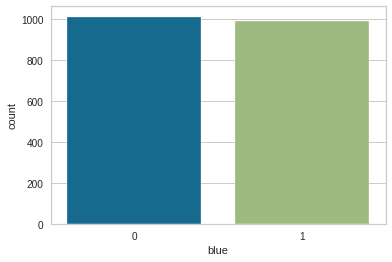

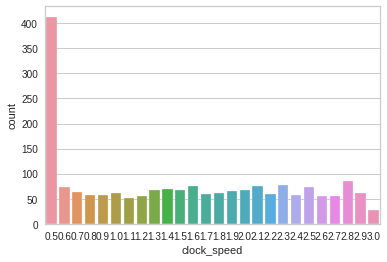

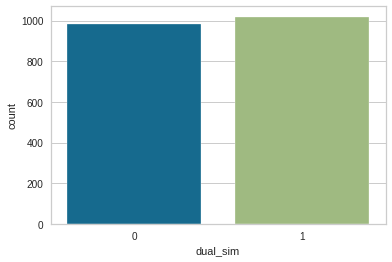

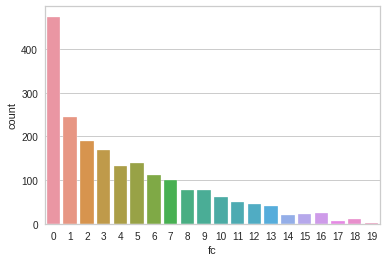

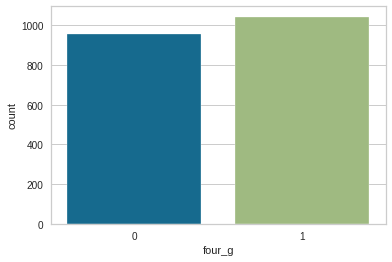

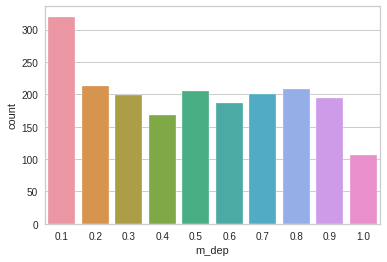

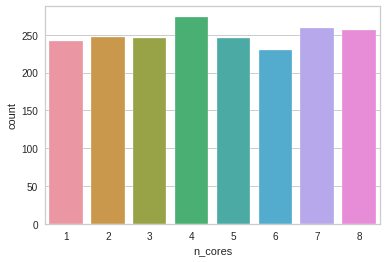

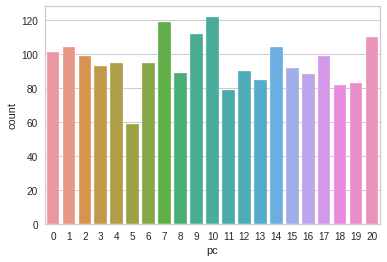

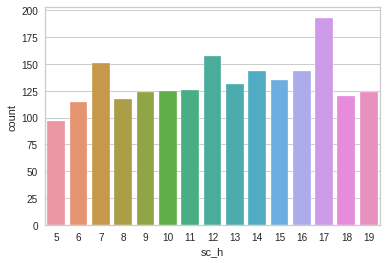

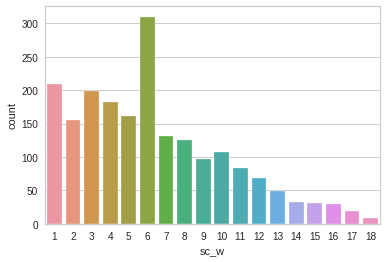

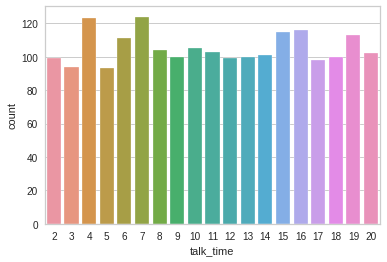

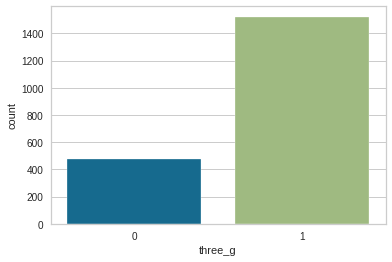

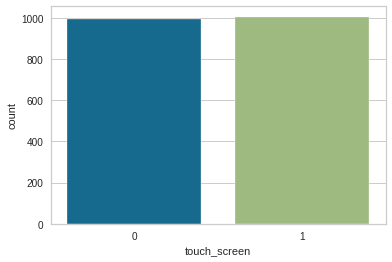

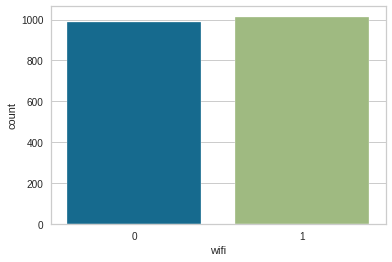

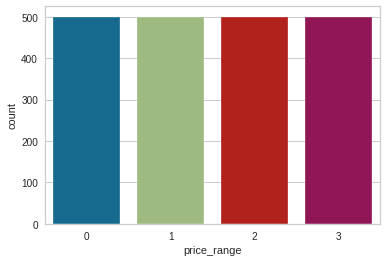

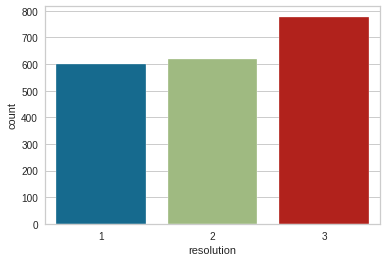

In [ ]:
#CountPlot for various columns
for i in mob_df:
    if(mob_df[i].nunique()<30):
        sns.countplot(x=mob_df[i])
        plt.show()

*   The mobile are equally categorized between all 4 price range.
*   Almost half of the mobiles in our dataset have bluetooth, dual sim, 4G, touch screen, wifi
*   Processors range from single core(1) to octa core(8).
*   Processor speed ranges from 0.5 to 3 GHz
*   Majority of mobiles(~75%) have 3G connectivity.
*   Mobile weight is upto 200g.

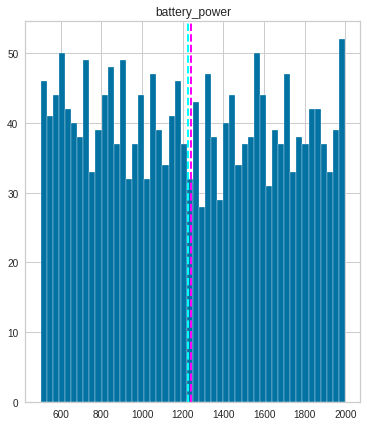

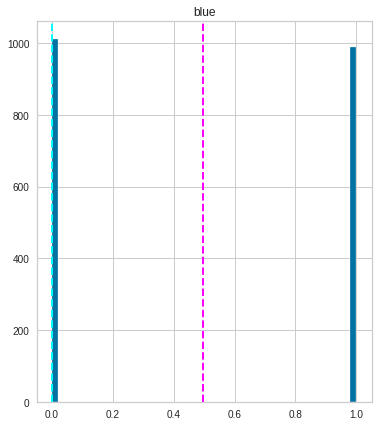

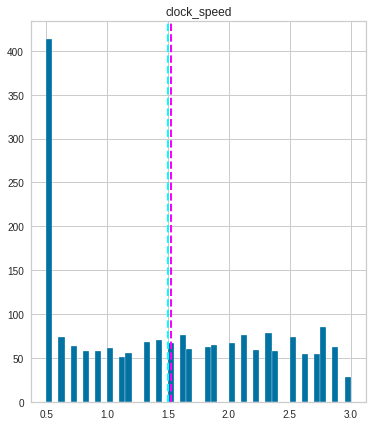

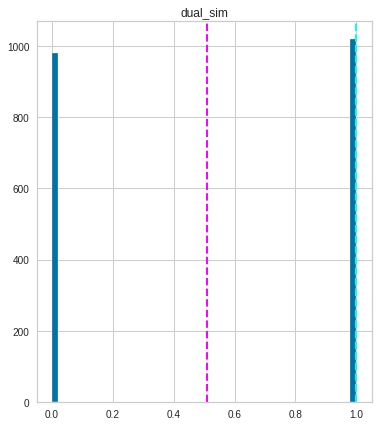

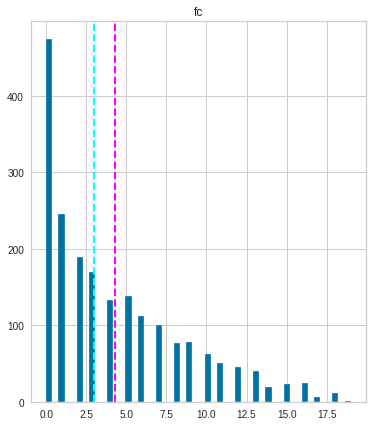

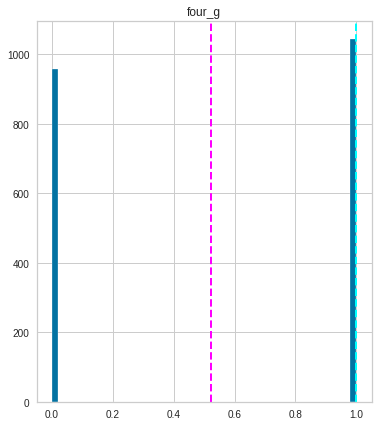

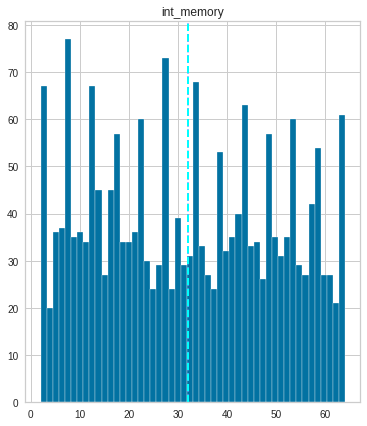

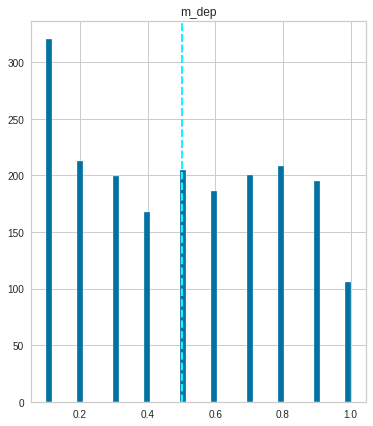

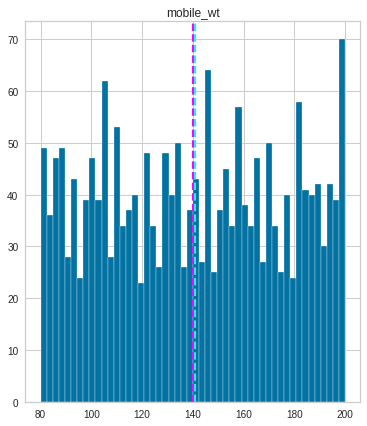

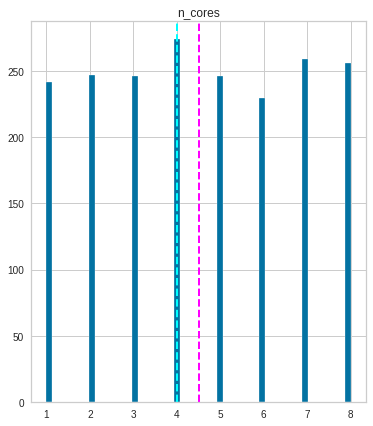

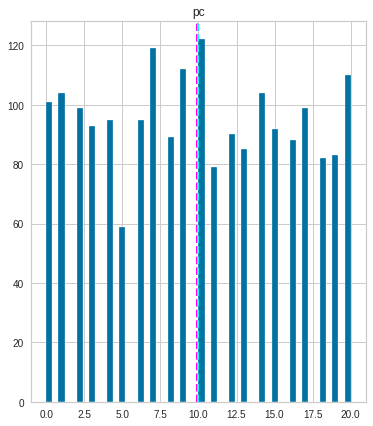

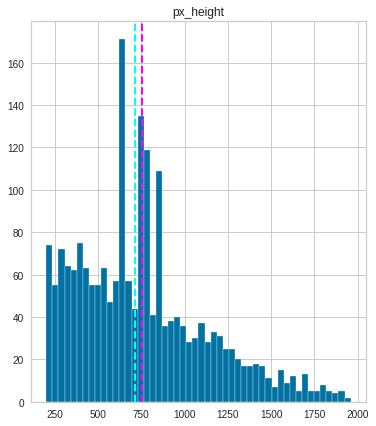

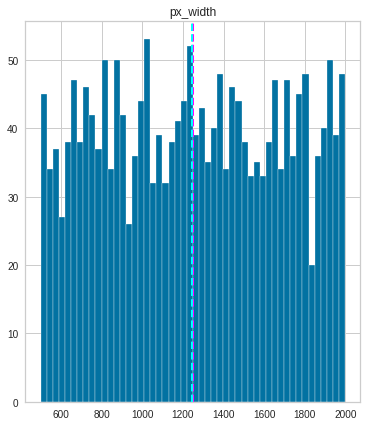

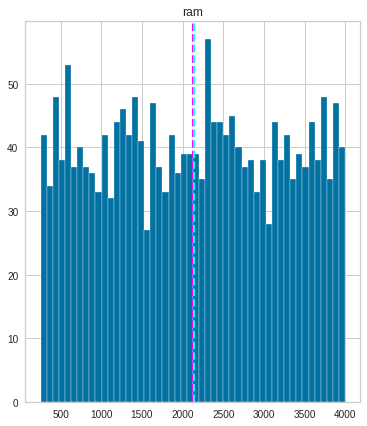

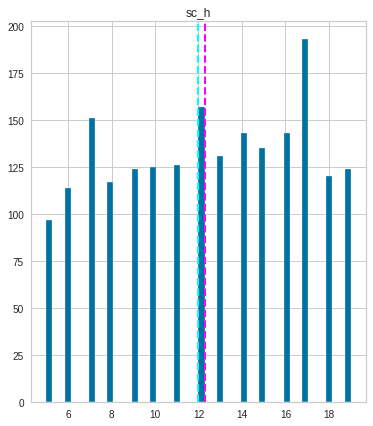

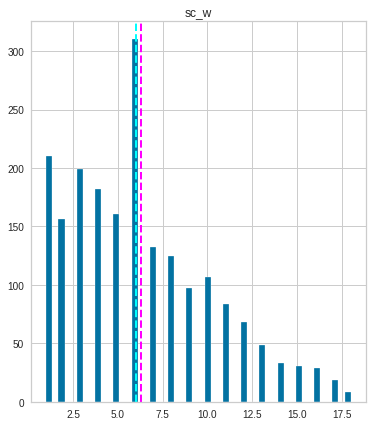

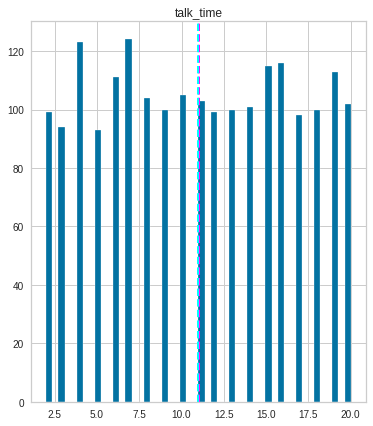

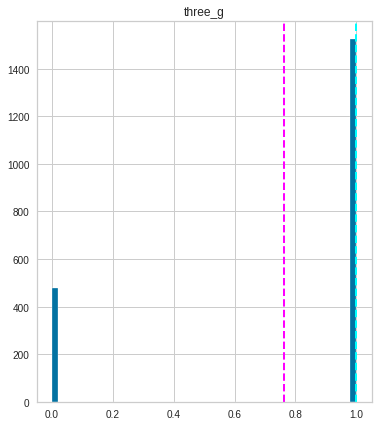

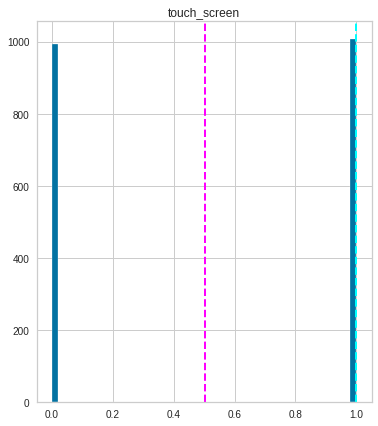

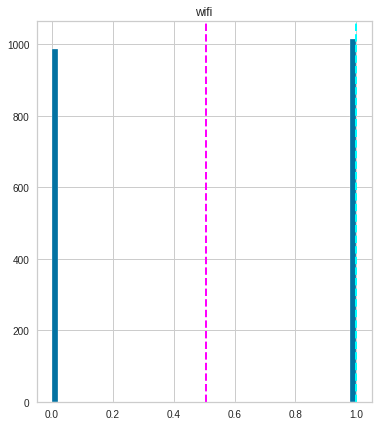

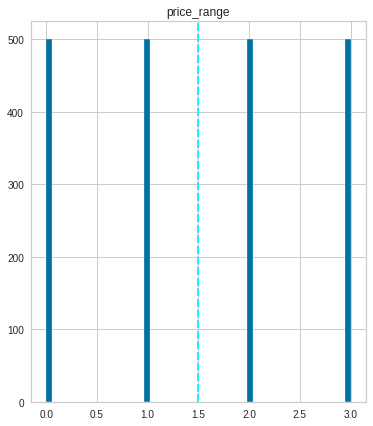

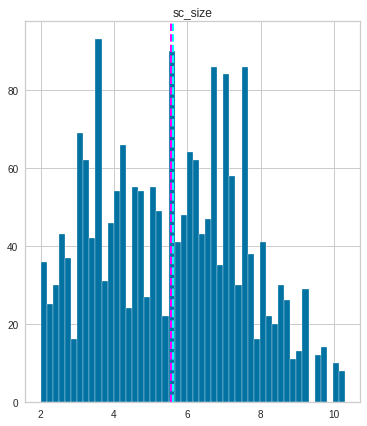

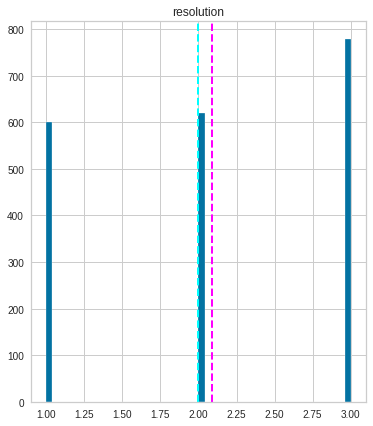

In [ ]:
#Distplot for various columns
for col in mob_df.columns:
  figure=plt.figure(figsize=(6,7))
  ax=figure.gca()
  feature = mob_df[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

Text(0.5, 1.0, 'Correlation ')

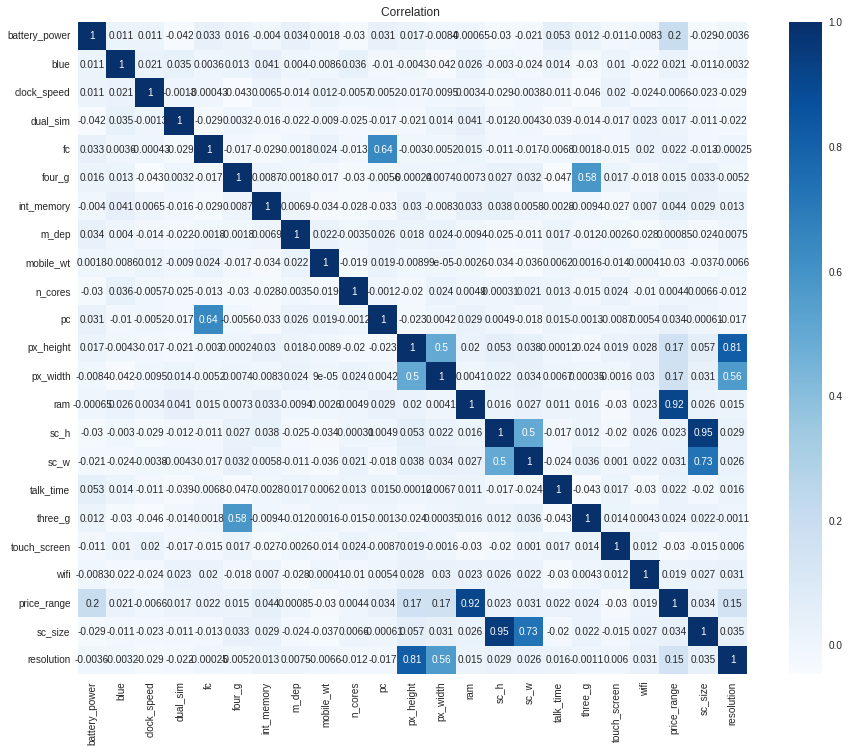

In [ ]:
# Correlation heatmap
corr=mob_df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Blues',annot=True)
r.set_title("Correlation ")

Our target variable Price Range has the highest correlation with RAM. So higher the ram, higher the price of mobile

Some other imp features are battery power,resolution.

Also, some features have high correlation with each other namely
1. front camera and primary camera
2. pixel height and width
3. screen height and width
4. 3G and 4G

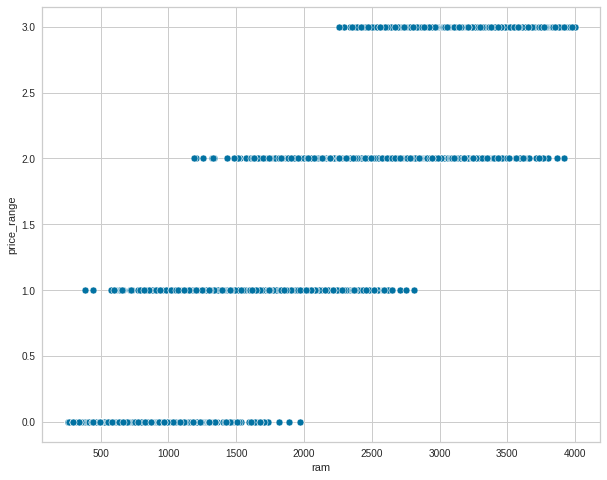

In [ ]:
# Check the range of RAM for the four price ranges
plt.figure(figsize=(10,8))
sns.scatterplot(mob_df['ram'],mob_df['price_range'])

From above plot we can say that

1. Mobiles with RAM upto 2GB falls into low price category
2. Mobiles with RAM from 0.5GB to 3GB falls into medium price category
3. Mobiles with RAM from 1GB to 4GB falls into high price category
4. Mobiles with RAM above 2GB falls into very high price category

Also, there is one interesting observation that RAM of 2GB can be a border line to separate low and very high price tags **directly** irrespective of other mobile specifications



Text(0.5, 1.0, 'RAM distribution of price range 3')

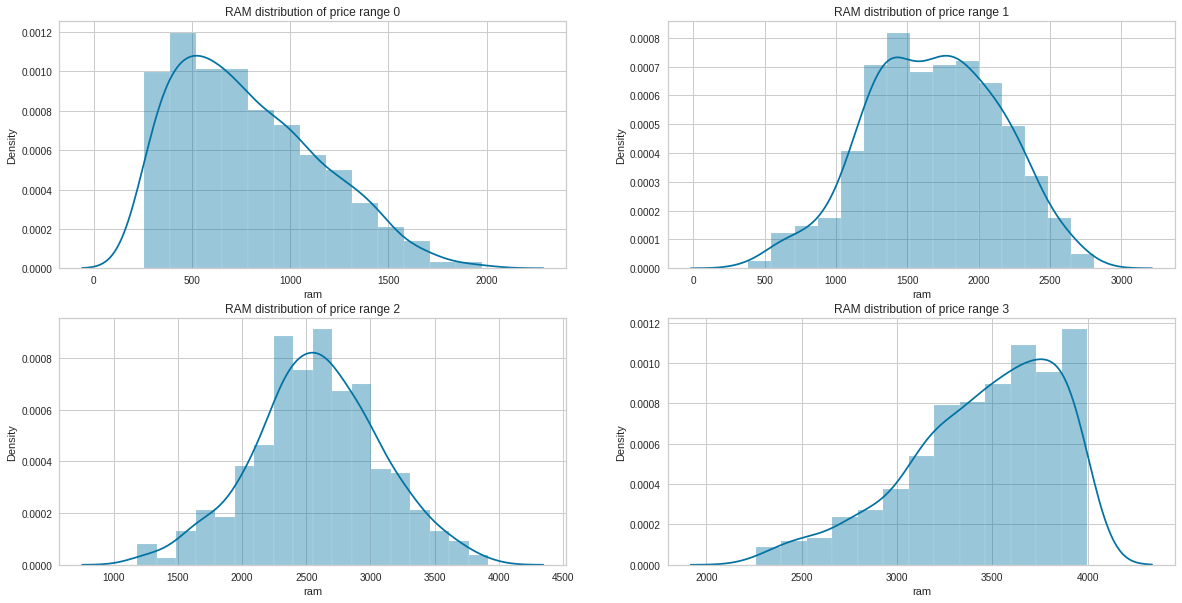

In [ ]:
# Lets check distribution of RAM for each price range seperately

plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(mob_df[mob_df['price_range']==0]['ram'])
plt.title('RAM distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(mob_df[mob_df['price_range']==1]['ram'])
plt.title('RAM distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(mob_df[mob_df['price_range']==2]['ram'])
plt.title('RAM distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(mob_df[mob_df['price_range']==3]['ram'])
plt.title('RAM distribution of price range 3')

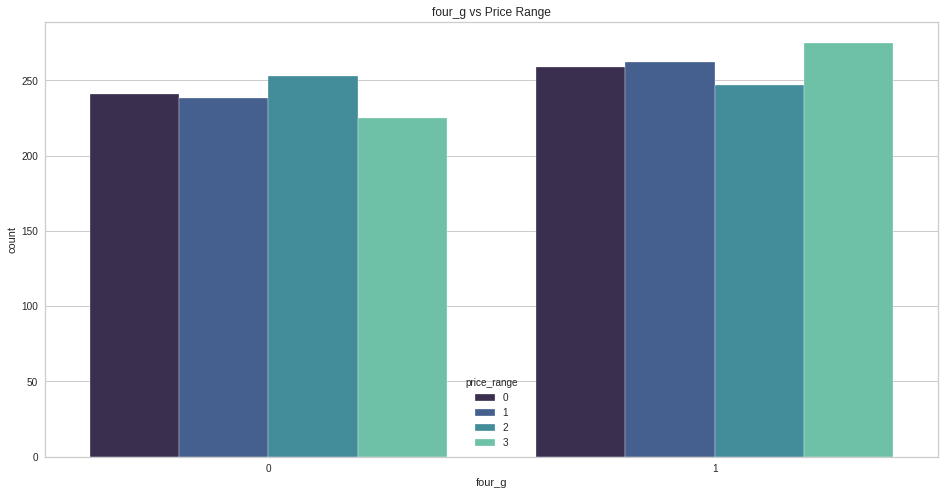

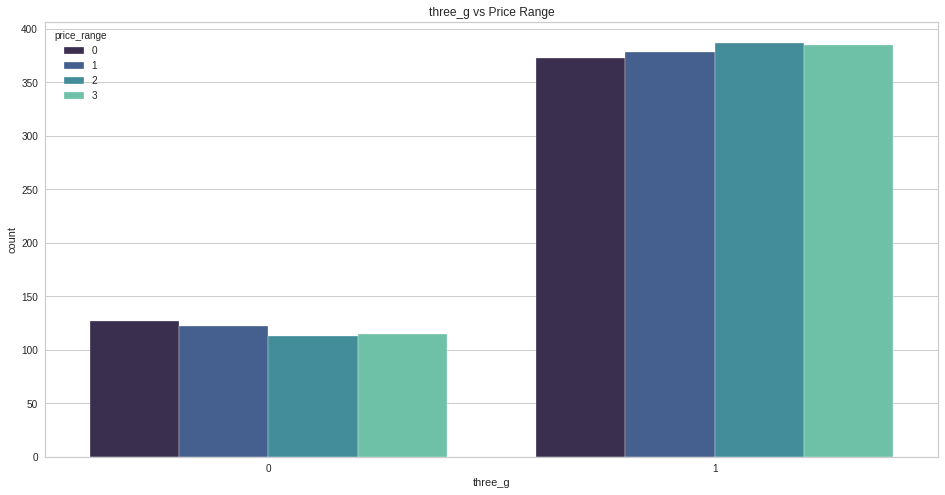

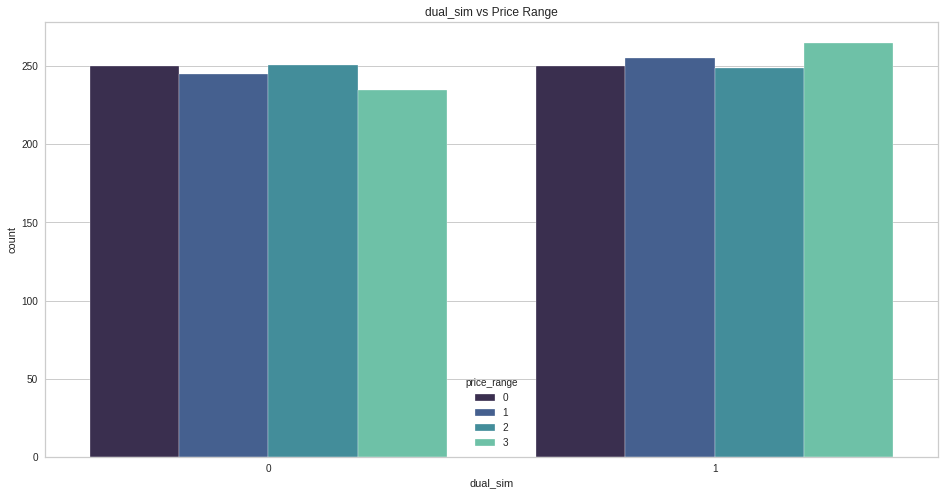

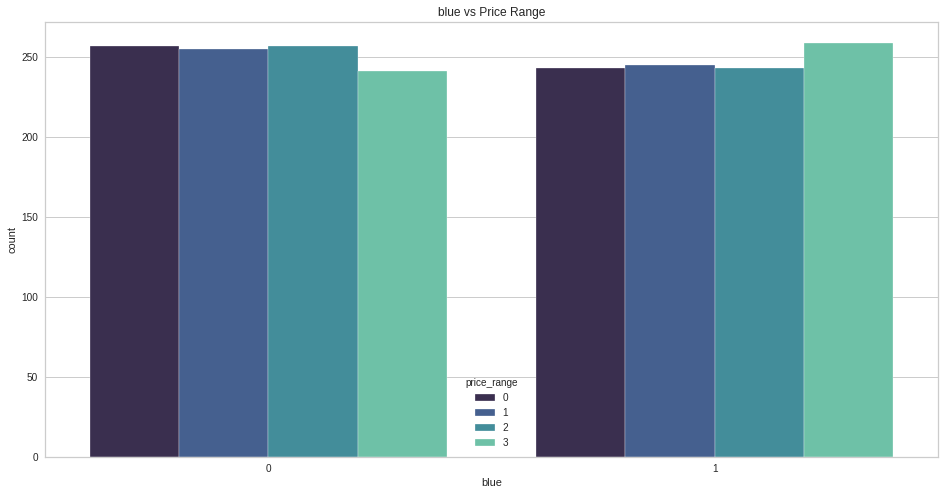

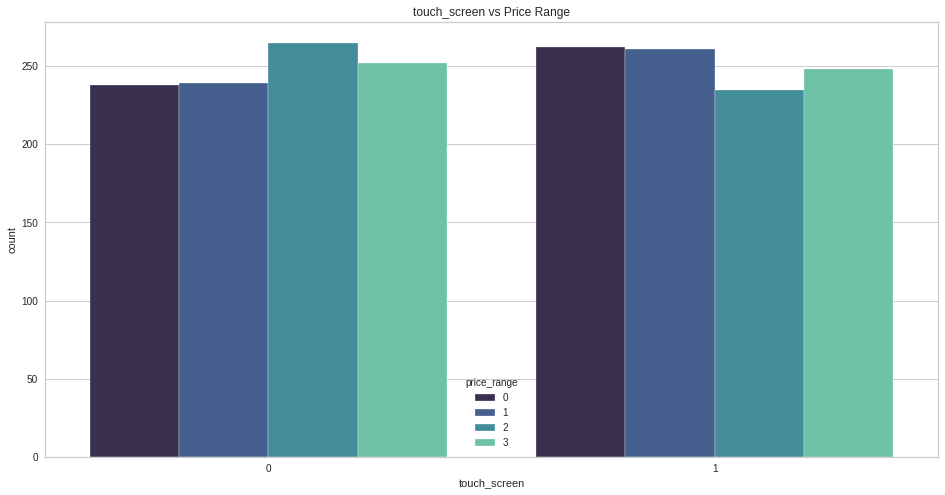

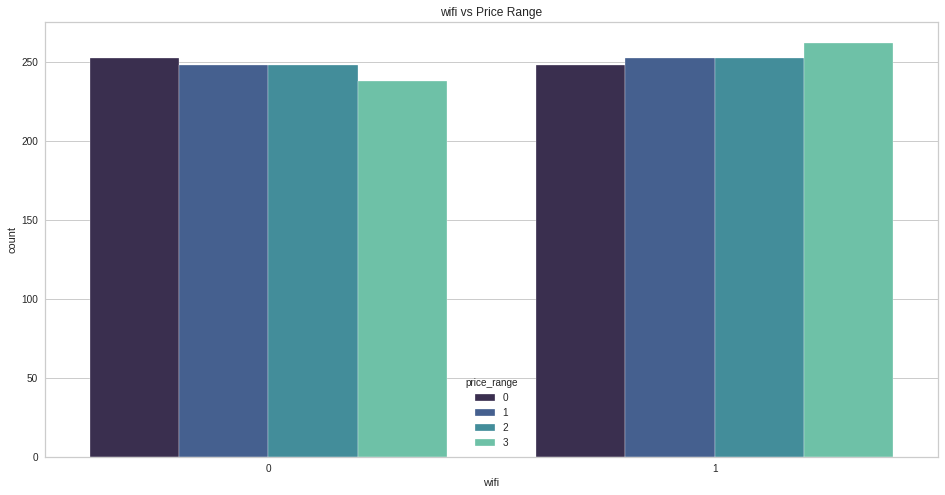

In [ ]:
# Comparing binary features with Price Range

for feature in ['four_g','three_g','dual_sim','blue','touch_screen','wifi']:
  plt.figure(figsize = (16, 8))
  plt.title(f'{feature} vs Price Range')
  sns.countplot(mob_df[feature], palette = 'mako', hue = mob_df['price_range'])

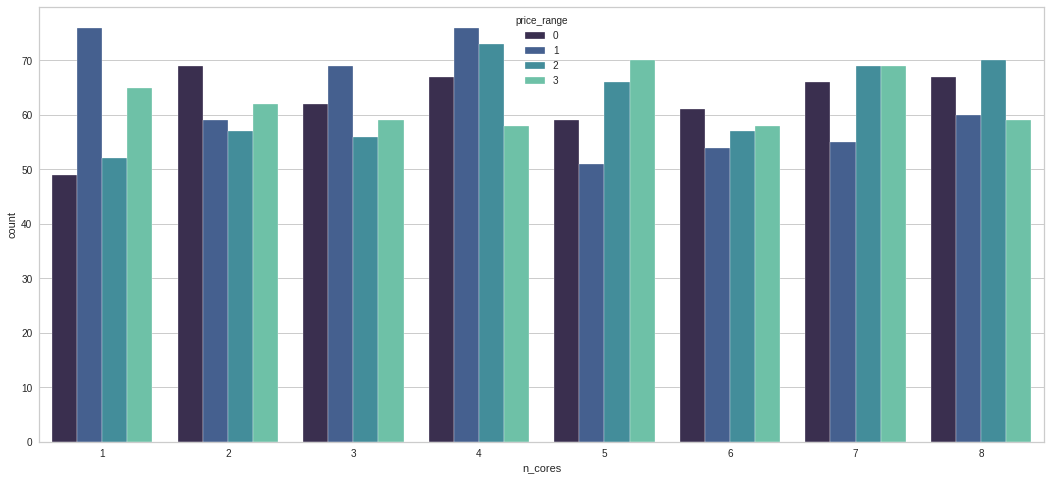

In [ ]:
# No of Cores vs Price Range
plt.figure(figsize = (18, 8))
sns.countplot(mob_df['n_cores'], palette = 'mako', hue = mob_df['price_range'])

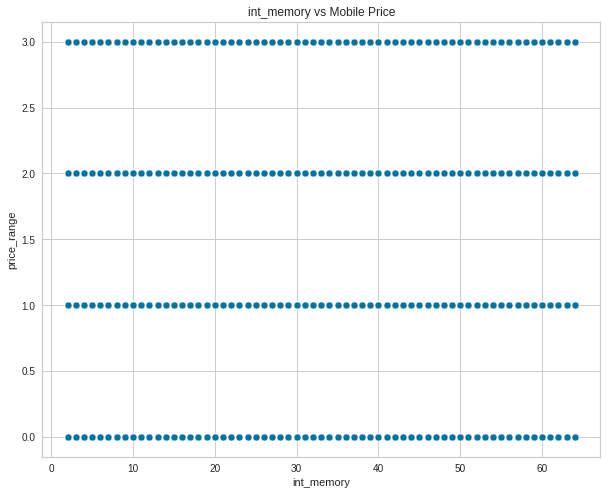

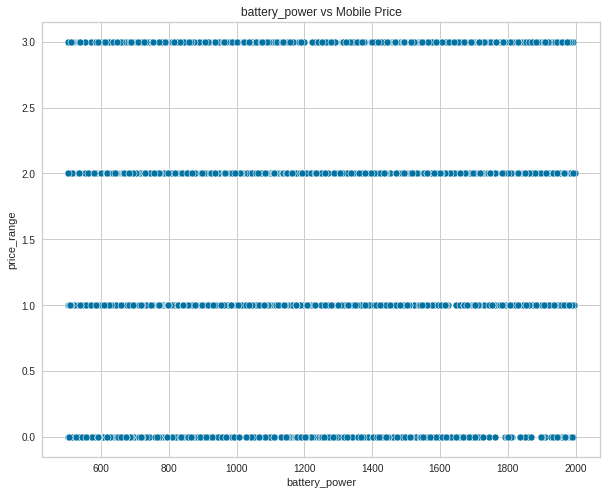

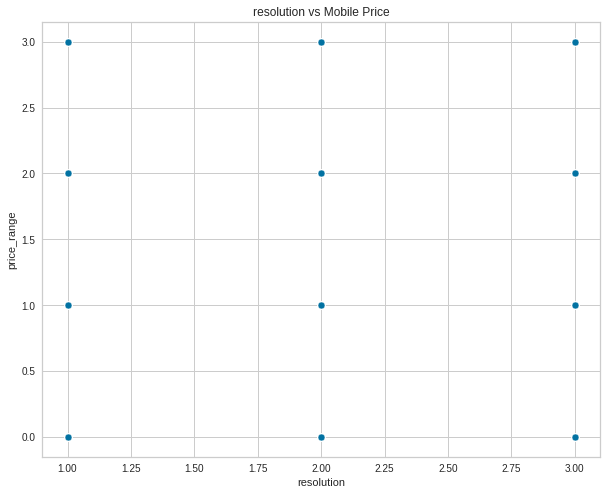

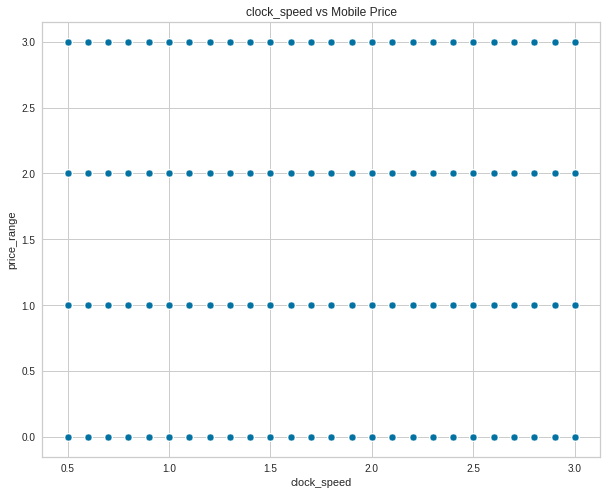

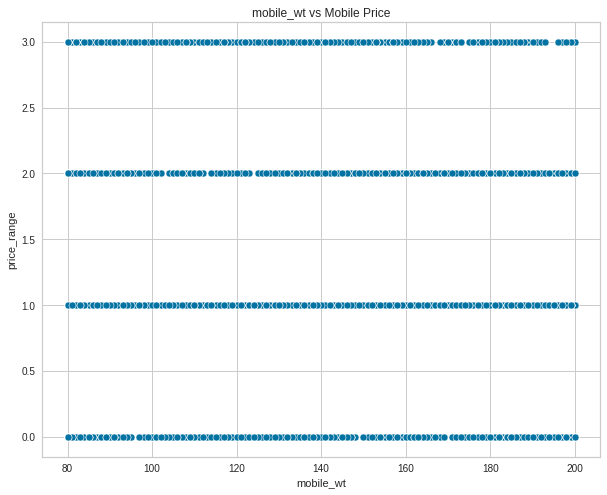

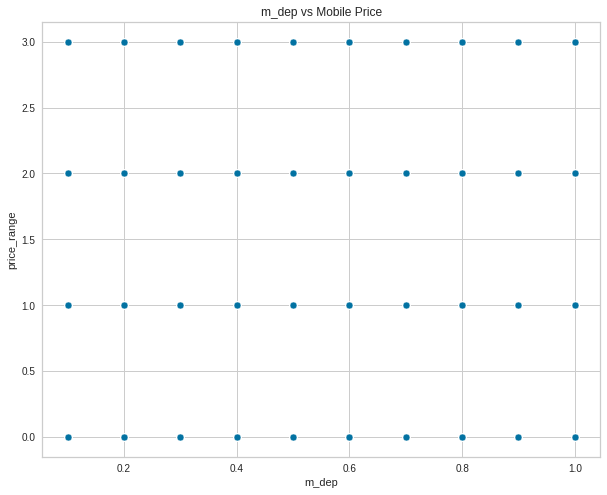

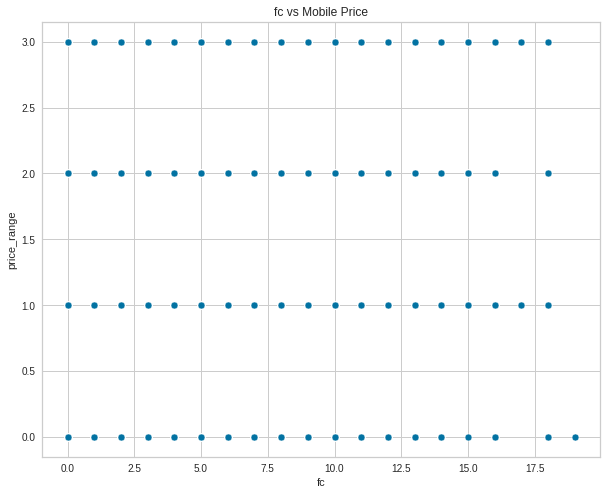

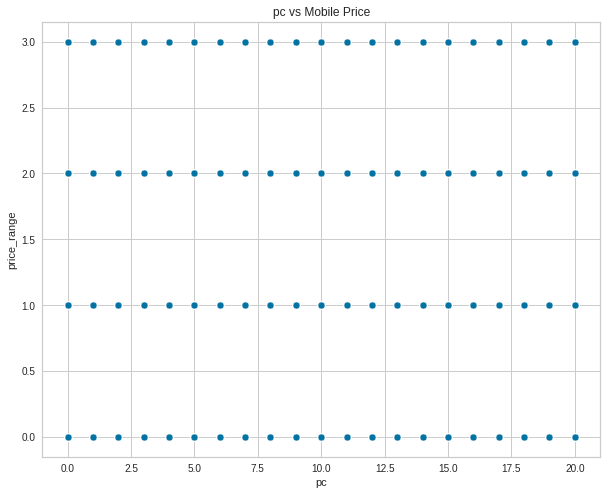

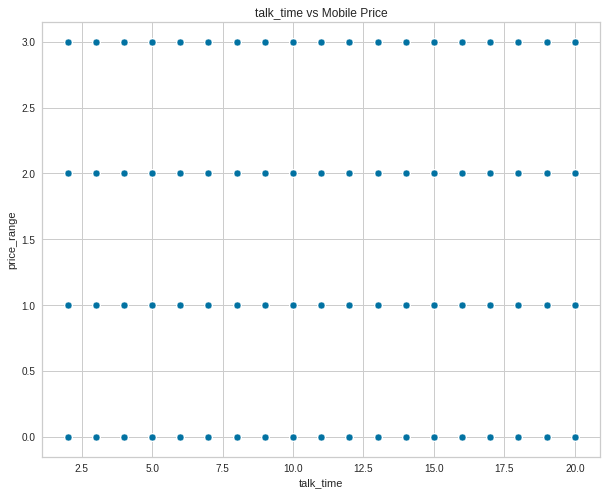

In [ ]:
# Scatter plot of imp features with price range

for feature in ['int_memory','battery_power','resolution','clock_speed','mobile_wt','m_dep','fc','pc','talk_time']:
  plt.figure(figsize=(10,8))
  plt.title(f'{feature} vs Mobile Price')
  sns.scatterplot(mob_df[feature],mob_df['price_range'])


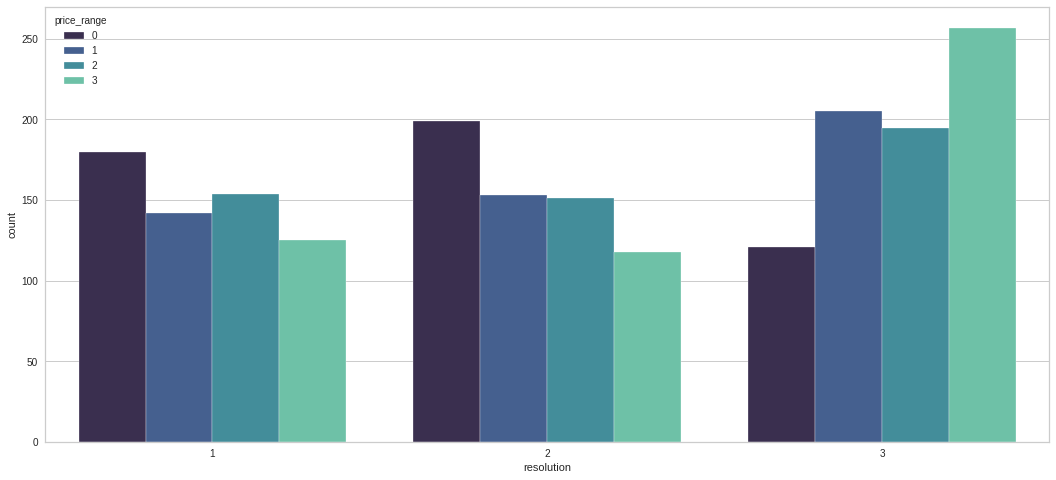

In [ ]:
# Resolution vs Price Range
plt.figure(figsize = (18, 8))
sns.countplot(mob_df['resolution'], palette = 'mako', hue = mob_df['price_range'])

So for higher price ranges, resolution is also high

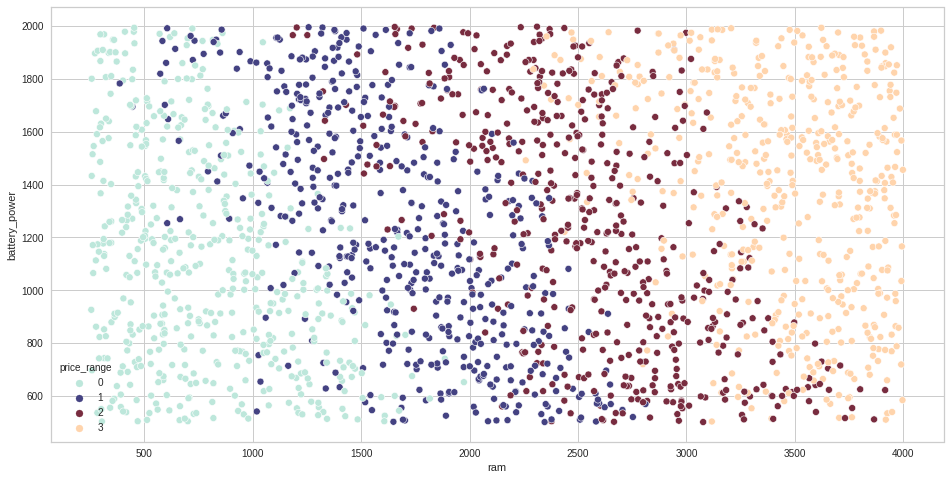

In [ ]:
# Battery power vs Ram

plt.figure(figsize = (16, 8))
sns.scatterplot(mob_df['ram'], mob_df['battery_power'], hue = mob_df['price_range'], palette = 'icefire')

Earlier we saw that RAM is the most imp feature for price range
And here we can see battery power varies with RAM

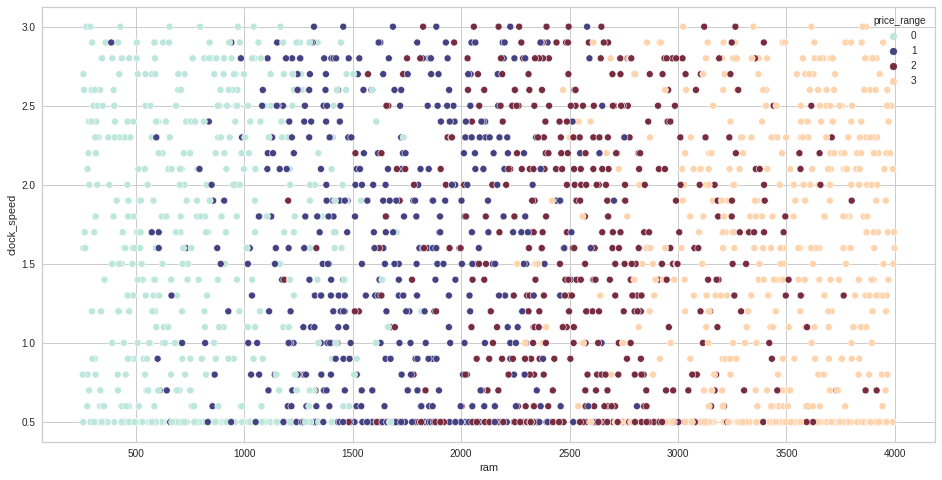

In [ ]:
#clock speed and ram

plt.figure(figsize = (16, 8))
sns.scatterplot(mob_df['ram'], mob_df['clock_speed'], hue = mob_df['price_range'], palette = 'icefire')


We can see that even with small ram it's possible to have up to 3 GHz clock speed

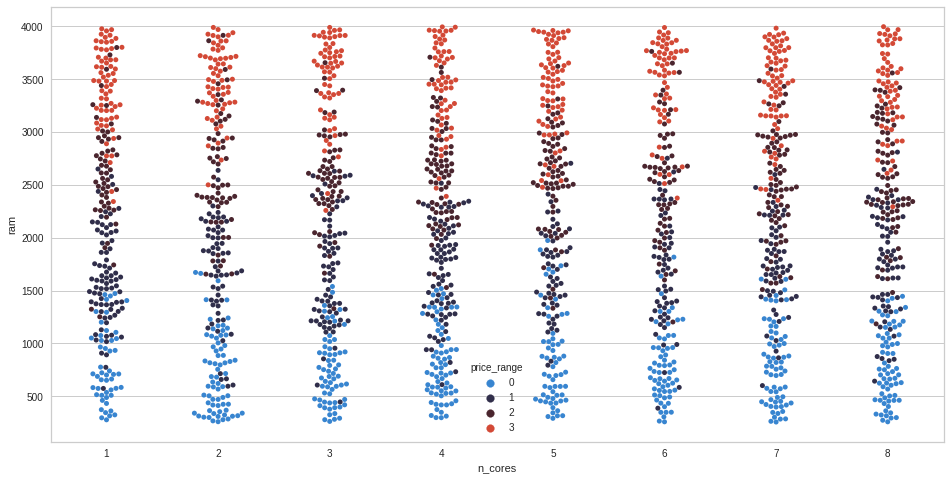

In [ ]:
# number of cores vs ram  

plt.figure(figsize = (16, 8))
sns.swarmplot(mob_df['n_cores'], mob_df['ram'], hue = mob_df['price_range'], palette = 'icefire')

From above plot, we can comment that we can have any number of cores from 1 to 8 for any range of RAM.

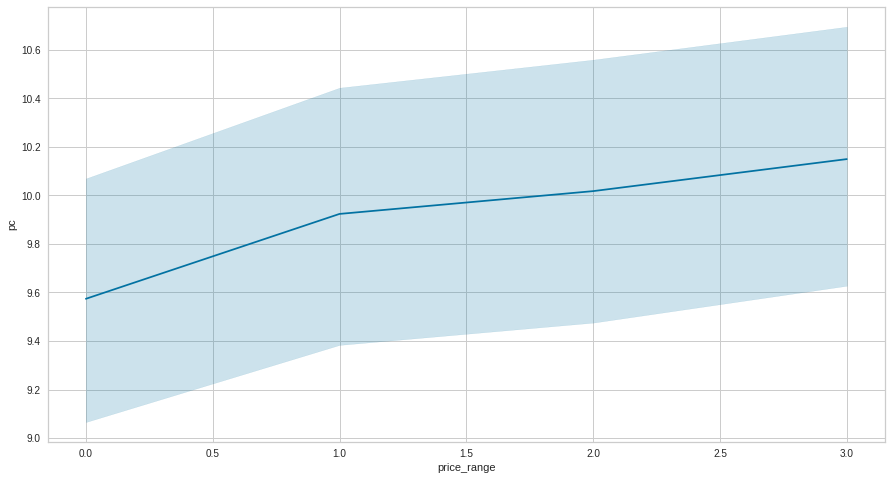

In [ ]:
# Front camera vs price range
plt.figure(figsize = (15, 8))
sns.lineplot(mob_df['price_range'], mob_df['pc'], palette = 'mako')
 

We can see that there's a increase in average primary camera megapixel when the price range increases

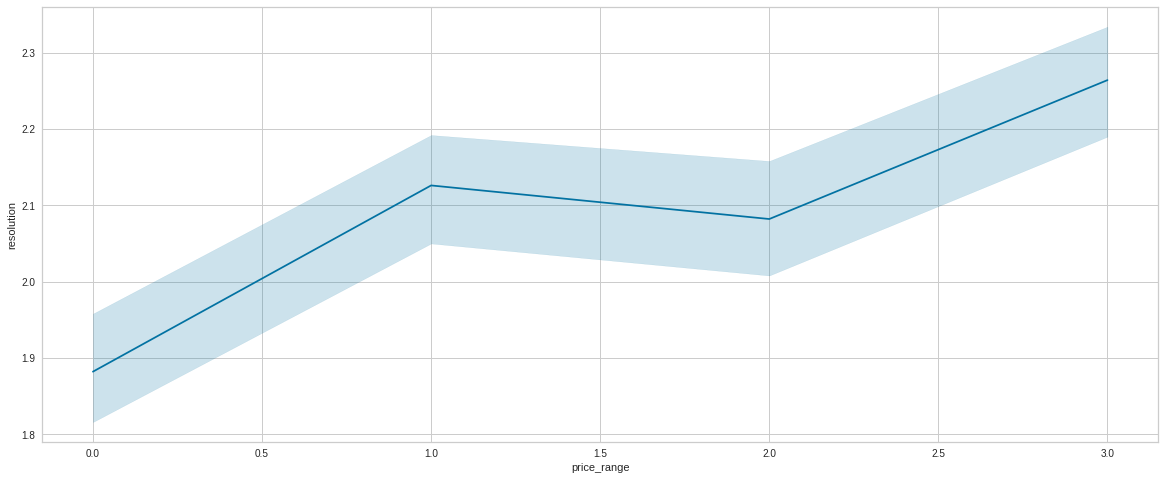

In [ ]:
# Pixel resolution vs price range
plt.figure(figsize = (20, 8))
sns.lineplot(x ='price_range', y ='resolution', data = mob_df)

So, on an average price increases as resolution pixel increase

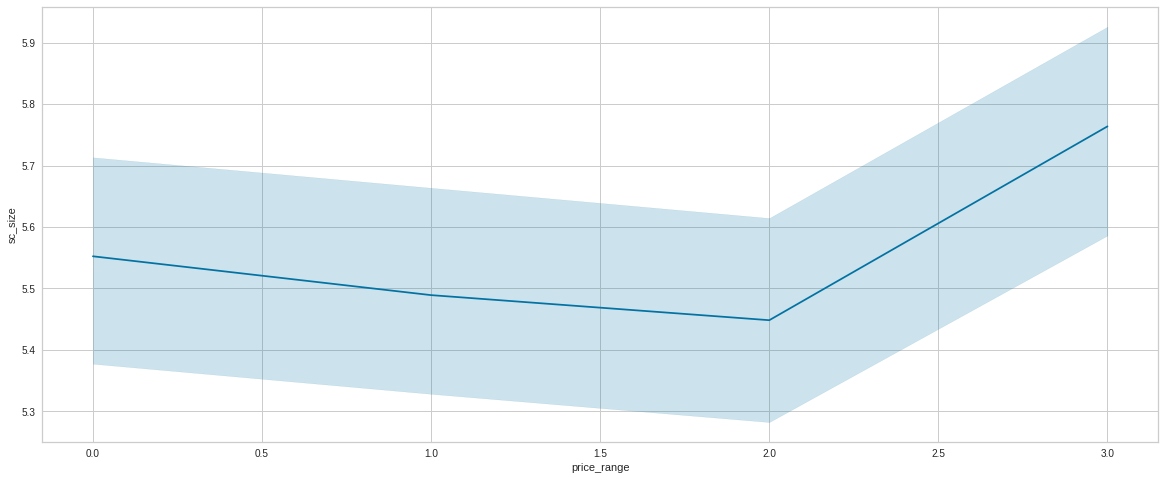

In [ ]:
# Screen size vs price range
plt.figure(figsize = (20, 8))
sns.lineplot(x ='price_range', y ='sc_size', data = mob_df)

# Train-test split


In [ ]:
mob_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size,resolution
0,842,0,2.2,0,1,0,7,0.6,188,2,2,769,756,2549,9,7,19,0,0,1,1,4.5,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,6.8,3
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,4.4,3
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,7.0,3
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,3.2,3


In [ ]:
# Making a copy and removing unwanted features
df_copy = mob_df.copy()
mob_df.drop(columns = ['resolution', 'sc_size'], inplace=True)

In [ ]:
mob_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
X=mob_df.drop(columns=['price_range'])
y=mob_df['price_range']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
print(X_train.shape,X_test.shape)

(1600, 20) (400, 20)


In [ ]:
std = StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

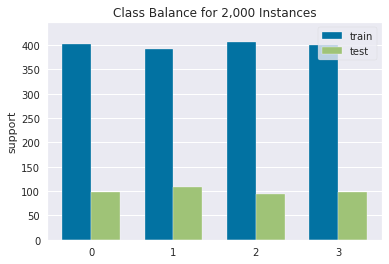

In [ ]:
# After splitting the data, lets check how the classes are split
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

# Naive Bayes Classifier - Base model

In [ ]:
nb_model = MultinomialNB(alpha=0.2)
nb = nb_model.fit(X_train,y_train)

In [ ]:
y_train_pred_nb = nb.predict(X_train)
y_pred_nb=nb.predict(X_test)

In [ ]:
print('First 10 actual vallues    :' , y_test[:10].values)
print('First 10 predicted vallues :' , y_pred_nb[:10])

First 10 actual vallues    : [0 2 1 2 3 1 3 3 2 1]
First 10 predicted vallues : [0 3 0 2 3 2 3 3 1 2]


In [ ]:
print('Report on Train Set')
print(classification_report(y_train, y_train_pred_nb))
print('Report on Test Set')
print(classification_report(y_test, y_pred_nb))

Report on Train Set
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       402
           1       0.42      0.38      0.39       391
           2       0.36      0.30      0.33       406
           3       0.53      0.66      0.59       401

    accuracy                           0.52      1600
   macro avg       0.51      0.52      0.51      1600
weighted avg       0.51      0.52      0.51      1600

Report on Test Set
              precision    recall  f1-score   support

           0       0.66      0.81      0.72        98
           1       0.45      0.38      0.41       109
           2       0.36      0.27      0.30        94
           3       0.58      0.70      0.64        99

    accuracy                           0.54       400
   macro avg       0.51      0.54      0.52       400
weighted avg       0.51      0.54      0.52       400



Also, as we have multi-class target variable, we will check the **weighted f1_score** which is found to be **0.51** and **0.52** for train & test set resp.

In [ ]:
# Storing the accuracy ,weighted f1 score and hamming loss for comparison
# Hamming loss is the fraction of targets that are misclassified.
nb_y_train_acc = accuracy_score(y_train, y_train_pred_nb)
nb_y_test_acc = accuracy_score(y_test, y_pred_nb)
nb_y_train_f1 = f1_score(y_train, y_train_pred_nb,average='weighted')
nb_y_test_f1 = f1_score(y_test, y_pred_nb,average='weighted')
nb_y_train_hl = hamming_loss(y_train, y_train_pred_nb)
nb_y_test_hl = hamming_loss(y_test, y_pred_nb)
print("Training accuracy", ":", nb_y_train_acc ,
      "Testing accuracy", ":", nb_y_test_acc)
print("Training weighted f1 score ", ":", nb_y_train_f1,
      "Testing weighted f1 score", ":",nb_y_test_f1)
print("Training hamming loss", ":", nb_y_train_hl ,
      "Testing hamming loss", ":",nb_y_test_hl)

Training accuracy : 0.518125 Testing accuracy : 0.535
Training weighted f1 score  : 0.5092788249550351 Testing weighted f1 score : 0.5177806163957752
Training hamming loss : 0.481875 Testing hamming loss : 0.465


In [ ]:
# Defining a function to display confusion matrix for train/test set
def CM(y_train_a,y_train_p,y_test_a,y_test_p):
  #geting the confusion matrix
  cm_train = confusion_matrix(y_train_a, y_train_p)
  cm_test =  confusion_matrix(y_test_a, y_test_p)
  #creating dataframe
  cm_train_df = pd.DataFrame(cm_train,
                     index = ['Low','Medium','High','Very High'], 
                     columns = ['Low','Medium','High','Very High'])
  cm_test_df = pd.DataFrame(cm_test,
                     index = ['Low','Medium','High','Very High'], 
                     columns = ['Low','Medium','High','Very High'])
  #plotting confusion matrix
  sns.set(font_scale=1.5)

  #Train set CM
  plt.figure(figsize=(12,8))
  sns.heatmap(cm_train_df, annot=True)
  plt.title('Confusion Matrix For Train set')
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()

  #Test set CM
  plt.figure(figsize=(12,8))
  sns.heatmap(cm_test_df, annot=True)
  plt.title('Confusion Matrix For Test set')
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()

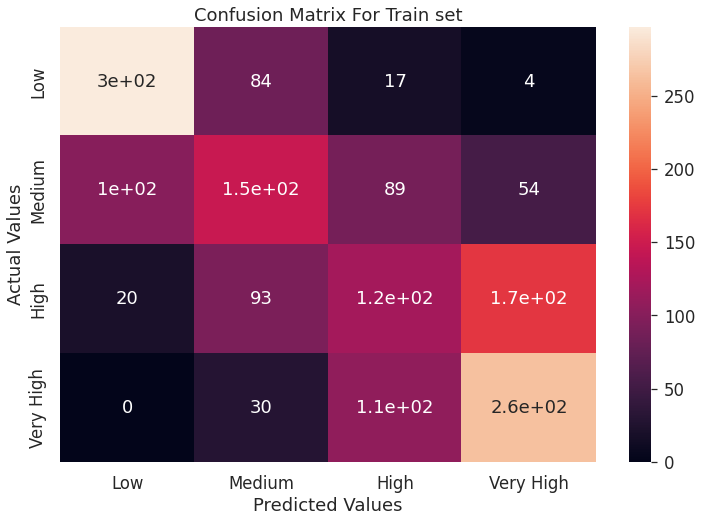

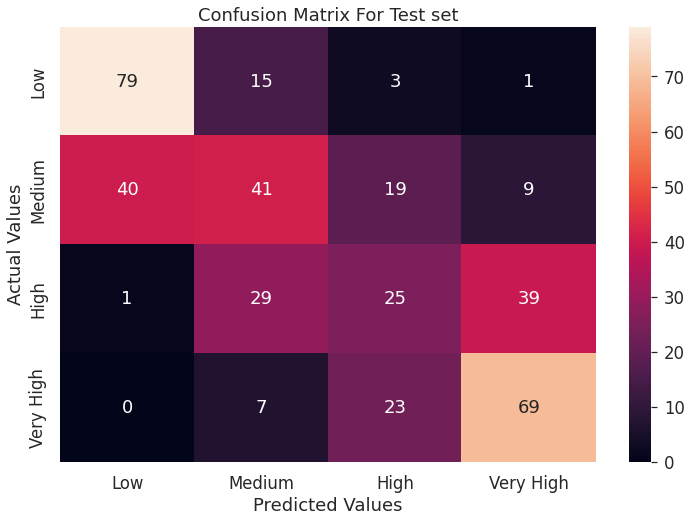

In [ ]:
# Confusion Mattrix
CM(y_train, y_train_pred_nb, y_test, y_pred_nb)

In [ ]:
# Creating a table to store first 10 predictions
predict_df = pd.DataFrame()
predict_df['Test'] = y_test[:10]
predict_df['Pred_NB'] = y_pred_nb[:10]
predict_df

,Test,Pred_NB
278,0,0
492,2,3
1266,1,0
557,2,2
871,3,3
1622,1,2
891,3,3
1749,3,3
1867,2,1
1798,1,2
